<a href="https://colab.research.google.com/github/D0mP3dr0/geoprocessing_gnn/blob/main/grapho_intra_roads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GRAPHON INTRA ROADS

In [1]:
# prompt: me de o comando para montar o drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


1. Instalação das Dependências

In [2]:
# Instalação de todas as dependências necessárias para processamento de grafos em GPU

!pip install torch==2.0.1 --extra-index-url https://download.pytorch.org/whl/cu118
!pip install torch-geometric==2.3.1
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-2.0.1+cu118.html
!pip install geopandas==0.13.2 networkx==3.1 matplotlib==3.7.2 seaborn==0.12.2
!pip install contextily==1.3.0 folium==0.14.0 pygeos==0.14 rtree==1.0.1
!pip install tqdm==4.66.1 plotly==5.15.0 scikit-learn==1.3.0 jsonschema==4.17.3
!pip install osmnx==1.5.1 momepy==0.6.0
!pip install Google-colab-ssh

import os
import sys
import time
import json
import logging
from datetime import datetime

print("Todas as dependências foram instaladas com sucesso!")

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.2.0
    Uninstalling triton-3.2.0:
      Successfully uninstalled triton-3.2.0
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0+cu124
    Uninstalling torch-2.6.0+cu124:
      Successfully uninstalled torch-2.6.0+cu124
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.6.0+cu124 requires torch==2.6.0, but you have torch 2.0.1+cu118 which is incompatible.
torchvision 0.21.0+cu124 requires torch==2.6.0, but you have torch 2.0.1+cu118 which i

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 24.5 MB/s eta 0:00:00
  Attempting uninstall: folium
    Found existing installation: folium 0.19.5
    Uninstalling folium-0.19.5:
      Successfully uninstalled folium-0.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
geemap 0.35.3 requires folium>=0.17.0, but you have folium 0.14.0 which is incompatible.
object address  : 0x7c2319c00280
object refcount : 2
object type     : 0x9d5ea0
object type name: KeyboardInterrupt
object repr     : KeyboardInterrupt()
lost sys.stderr
Traceback (most recent call last):
^C
^C
^C
Todas as dependências foram instaladas com sucesso!


2. Configuração do Ambiente e Diretórios

In [1]:
# Parte 1: Downgrade do NumPy e configuração inicial
from google.colab import drive
import os
import sys
import logging
from datetime import datetime

# Downgrade do NumPy para versão compatível
!pip install numpy==1.24.3 --force-reinstall

# Montando o Google Drive
drive.mount('/content/drive')

# Configuração dos diretórios de trabalho
BASE_DIR = '/content/drive/MyDrive/geoprocessamento_gnn'
DATA_DIR = os.path.join(BASE_DIR, 'DATA')
MATRICES_DIR = os.path.join(BASE_DIR, 'matrices')
LOG_DIR = os.path.join(BASE_DIR, 'logs')
REPORT_DIR = os.path.join(BASE_DIR, 'reports')

# Criação dos diretórios se não existirem
for directory in [BASE_DIR, DATA_DIR, MATRICES_DIR, LOG_DIR, REPORT_DIR]:
    os.makedirs(directory, exist_ok=True)

print("Parte 1 concluída. IMPORTANTE: Reinicie o runtime agora!")

  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
torchvision 0.21.0+cu124 requires torch==2.6.0, but you have torch 2.0.1+cu118 which is incompatible.
geemap 0.35.3 requires folium>=0.17.0, but you have folium 0.14.0 which is incompatible.
tensorflow 2.18.0

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Parte 1 concluída. IMPORTANTE: Reinicie o runtime agora!


In [3]:
# Parte 2: Importações e configuração completa (execute após reiniciar o runtime)
from google.colab import drive
import os
import sys
import logging
from datetime import datetime
import numpy as np
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import torch
from torch_geometric.data import Data
# Para usar Shapely em vez de PyGEOS
import os
os.environ['USE_PYGEOS'] = '0'
# Montando o Google Drive
drive.mount('/content/drive')

# Configuração dos diretórios de trabalho
BASE_DIR = '/content/drive/MyDrive/geoprocessamento_gnn'
DATA_DIR = os.path.join(BASE_DIR, 'DATA')
MATRICES_DIR = os.path.join(BASE_DIR, 'matrices')
LOG_DIR = os.path.join(BASE_DIR, 'logs')
REPORT_DIR = os.path.join(BASE_DIR, 'reports')

# Criação dos diretórios se não existirem
for directory in [BASE_DIR, DATA_DIR, MATRICES_DIR, LOG_DIR, REPORT_DIR]:
    os.makedirs(directory, exist_ok=True)

# Configuração do logging
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
log_filename = os.path.join(LOG_DIR, f'road_graph_processing_{timestamp}.log')

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler(log_filename),
        logging.StreamHandler(sys.stdout)
    ]
)

logger = logging.getLogger("GNN_Road_Graph")
logger.info("Ambiente configurado com sucesso")
logger.info(f"Diretório base: {BASE_DIR}")
logger.info(f"Arquivo de log: {log_filename}")

# Verificação da disponibilidade de GPU
if torch.cuda.is_available():
    device = torch.device('cuda')
    logger.info(f"GPU disponível: {torch.cuda.get_device_name(0)}")
    logger.info(f"Memória total da GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    logger.info(f"Memória disponível: {torch.cuda.memory_allocated(0) / 1e9:.2f} GB usado")
else:
    device = torch.device('cpu')
    logger.warning("GPU não disponível. Usando CPU.")

# Arquivo de entrada
input_file = os.path.join(DATA_DIR, 'roads_enriched_20250412_230707.gpkg')
logger.info(f"Arquivo de entrada: {input_file}")

# Verificação da existência do arquivo
if os.path.exists(input_file):
    logger.info(f"Arquivo encontrado: {input_file}")
else:
    logger.error(f"Arquivo não encontrado: {input_file}")
    # Podemos procurar outros arquivos GPKG disponíveis
    gpkg_files = [f for f in os.listdir(DATA_DIR) if f.endswith('.gpkg')]
    if gpkg_files:
        logger.info(f"Arquivos GPKG disponíveis no diretório: {gpkg_files}")
    else:
        logger.warning(f"Nenhum arquivo GPKG encontrado em {DATA_DIR}")

# Instalação de pacotes necessários (se ainda não estiverem instalados)
try:
    import osmnx as ox
    logger.info("OSMnx já está instalado")
except ImportError:
    logger.info("Instalando OSMnx...")
    !pip install osmnx
    import osmnx as ox
    logger.info("OSMnx instalado com sucesso")

try:
    from torch_geometric.nn import GCNConv
    logger.info("PyTorch Geometric já está instalado")
except ImportError:
    logger.info("Instalando PyTorch Geometric...")
    !pip install torch-geometric
    from torch_geometric.nn import GCNConv
    logger.info("PyTorch Geometric instalado com sucesso")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3. Carregamento e Processamento dos Dados GPKG

In [6]:
# Instalar uma versão compatível do Fiona
!pip uninstall -y fiona
!pip install fiona==1.9.5

# Reiniciar o runtime do Colab após esta instalação
# Isso é crucial para que as alterações sejam aplicadas corretamente

Found existing installation: fiona 1.10.1
Uninstalling fiona-1.10.1:
  Successfully uninstalled fiona-1.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 84.5 MB/s eta 0:00:00


In [1]:
# Parte 1: Configuração do ambiente com versões compatíveis
!pip install numpy==1.24.3 --force-reinstall
!pip install fiona==1.9.5

  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
torchvision 0.21.0+cu124 requires torch==2.6.0, but you have torch 2.0.1+cu118 which is incompatible.
geemap 0.35.3 requires folium>=0.17.0, but you have folium 0.14.0 which is incompatible.
tensorflow 2.18.0

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
^C


In [2]:
# Step 1: Install compatible versions of packages
!pip install numpy==1.24.3 --force-reinstall
!pip install fiona==1.9.5
!pip install geopandas==0.13.2

  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
torchvision 0.21.0+cu124 requires torch==2.6.0, but you have torch 2.0.1+cu118 which is incompatible.
geemap 0.35.3 requires folium>=0.17.0, but you have folium 0.14.0 which is incompatible.
tensorflow 2.18.0

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

In [1]:
# Complete setup and data processing code with all necessary imports

# Basic imports
import os
import sys
import logging
from datetime import datetime
import time
import numpy as np
import pandas as pd

# Configure environment to use Shapely instead of PyGEOS
import os
os.environ['USE_PYGEOS'] = '0'

# GIS and spatial imports
import geopandas as gpd
from shapely.geometry import LineString, Point, MultiLineString

# Network analysis imports
import networkx as nx
import torch
from torch_geometric.data import Data
from tqdm.notebook import tqdm

# Google Drive mounting
from google.colab import drive
drive.mount('/content/drive')

# Directory configuration
BASE_DIR = '/content/drive/MyDrive/geoprocessamento_gnn'
DATA_DIR = os.path.join(BASE_DIR, 'DATA')
MATRICES_DIR = os.path.join(BASE_DIR, 'matrices')
LOG_DIR = os.path.join(BASE_DIR, 'logs')
REPORT_DIR = os.path.join(BASE_DIR, 'reports')

# Create directories if they don't exist
for directory in [BASE_DIR, DATA_DIR, MATRICES_DIR, LOG_DIR, REPORT_DIR]:
    os.makedirs(directory, exist_ok=True)

# Logging configuration
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
log_filename = os.path.join(LOG_DIR, f'road_graph_processing_{timestamp}.log')

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler(log_filename),
        logging.StreamHandler(sys.stdout)
    ]
)

logger = logging.getLogger("GNN_Road_Graph")
logger.info("Ambiente configurado com sucesso")
logger.info(f"Diretório base: {BASE_DIR}")
logger.info(f"Arquivo de log: {log_filename}")

# Check for GPU
if torch.cuda.is_available():
    device = torch.device('cuda')
    logger.info(f"GPU disponível: {torch.cuda.get_device_name(0)}")
    logger.info(f"Memória total da GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    logger.info(f"Memória disponível: {torch.cuda.memory_allocated(0) / 1e9:.2f} GB usado")
else:
    device = torch.device('cpu')
    logger.warning("GPU não disponível. Usando CPU.")

# Data file configuration
input_file = os.path.join(DATA_DIR, 'roads_enriched_20250412_230707.gpkg')
logger.info(f"Arquivo de entrada: {input_file}")

# Check if file exists
if os.path.exists(input_file):
    logger.info(f"Arquivo encontrado: {input_file}")
else:
    logger.error(f"Arquivo não encontrado: {input_file}")
    # Look for alternative GPKG files
    gpkg_files = [f for f in os.listdir(DATA_DIR) if f.endswith('.gpkg')]
    if gpkg_files:
        logger.info(f"Arquivos GPKG disponíveis no diretório: {gpkg_files}")
        # Use the first available GPKG file
        input_file = os.path.join(DATA_DIR, gpkg_files[0])
        logger.info(f"Usando arquivo alternativo: {input_file}")
    else:
        logger.warning(f"Nenhum arquivo GPKG encontrado em {DATA_DIR}")

# Data loading and processing
logger.info("Iniciando carregamento dos dados GPKG")
start_time = time.time()

try:
    # Load GPKG file
    roads_gdf = gpd.read_file(input_file)

    # Basic information
    num_features = len(roads_gdf)
    geometry_types = roads_gdf.geometry.type.unique().tolist()
    crs = roads_gdf.crs

    logger.info(f"Dados carregados com sucesso: {num_features} feições")
    logger.info(f"Tipos de geometria: {geometry_types}")
    logger.info(f"Sistema de coordenadas: {crs}")
    logger.info(f"Colunas disponíveis: {roads_gdf.columns.tolist()}")

    # Basic data analysis
    logger.info("Realizando análise básica dos dados")
    missing_values = roads_gdf.isnull().sum()
    logger.info(f"Valores ausentes por coluna:\n{missing_values[missing_values > 0]}")

    # Convert MultiLineString to LineString to facilitate graph creation
    def explode_multilines(gdf):
        rows = []
        for idx, row in gdf.iterrows():
            if isinstance(row.geometry, MultiLineString):
                for line in row.geometry.geoms:
                    new_row = row.copy()
                    new_row.geometry = line
                    rows.append(new_row)
            else:
                rows.append(row)
        return gpd.GeoDataFrame(rows, crs=gdf.crs)

    roads_gdf = explode_multilines(roads_gdf)
    logger.info(f"Dados processados após expansão de MultiLineString: {len(roads_gdf)} feições")

    # Simplify and clean data
    # Ensure all geometries are valid
    roads_gdf = roads_gdf[roads_gdf.geometry.is_valid]
    roads_gdf = roads_gdf.reset_index(drop=True)

    # Calculate length of each segment
    roads_gdf['length'] = roads_gdf.geometry.length

    # Save processed copy
    processed_file = os.path.join(DATA_DIR, f'roads_processed_{timestamp}.gpkg')
    roads_gdf.to_file(processed_file, driver='GPKG')
    logger.info(f"Dados processados salvos em: {processed_file}")

    elapsed_time = time.time() - start_time
    logger.info(f"Processamento dos dados concluído em {elapsed_time:.2f} segundos")

except Exception as e:
    logger.error(f"Erro ao carregar ou processar os dados: {str(e)}")
    import traceback
    logger.error(traceback.format_exc())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


4. Construção do Grafo (edge_index, matriz de features)

In [4]:
# Construção do grafo rodoviário (edge_index, matriz de features)

from torch_geometric.data import Data
import torch
import pickle
import json  # Adicionando importação necessária

logger.info("Iniciando construção do grafo rodoviário")
start_time = time.time()

try:
    # Função para criar um grafo NetworkX a partir do GeoDataFrame
    def create_road_graph(gdf):
        logger.info("Criando grafo a partir do GeoDataFrame")
        G = nx.Graph()

        # Dicionário para armazenar coordenadas de nós
        node_coords = {}
        edge_data = {}

        # Contador para nós únicos
        node_count = 0

        # Para cada linha do GeoDataFrame
        for idx, row in tqdm(gdf.iterrows(), total=len(gdf), desc="Processando linhas"):
            geom = row.geometry
            if geom.geom_type != 'LineString':  # Corrigido de .type para .geom_type
                continue

            # Extrair pontos inicial e final
            start_point = tuple(geom.coords[0])
            end_point = tuple(geom.coords[-1])

            # Atribuir IDs aos nós se ainda não existirem
            for point in [start_point, end_point]:
                if point not in node_coords:
                    node_coords[point] = node_count
                    G.add_node(node_count, x=point[0], y=point[1])
                    node_count += 1

            # Adicionar aresta com atributos
            start_idx = node_coords[start_point]
            end_idx = node_coords[end_point]

            # Atributos da aresta
            edge_attrs = {
                'length': row.length,
                'osm_id': row.get('osm_id', None),
                'highway': row.get('highway', None),
                'name': row.get('name', None),
                'geometry': geom
            }

            # Adicionar outros atributos disponíveis
            for col in row.index:
                if col not in ['geometry', 'length', 'osm_id', 'highway', 'name'] and not pd.isna(row[col]):
                    edge_attrs[col] = row[col]

            # Adicionar aresta ao grafo
            G.add_edge(start_idx, end_idx, **edge_attrs)
            edge_data[(start_idx, end_idx)] = edge_attrs

        logger.info(f"Grafo criado com {G.number_of_nodes()} nós e {G.number_of_edges()} arestas")
        return G, node_coords, edge_data

    # Criar grafo
    G, node_coords, edge_data = create_road_graph(roads_gdf)

    # Converter para PyTorch Geometric
    logger.info("Convertendo para formato PyTorch Geometric")

    # 1. Criar edge_index (formato COO)
    edge_index = []
    edge_attrs_list = []

    for edge in G.edges():
        edge_index.append([edge[0], edge[1]])
        edge_index.append([edge[1], edge[0]])  # Para grafo não direcionado

        # Duplicar atributos para ambas direções
        attrs = G.edges[edge]
        edge_attrs_list.append(attrs)
        edge_attrs_list.append(attrs)

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

    # 2. Criar matriz de características dos nós
    # Extrair coordenadas como características básicas
    node_features = []
    for i in range(G.number_of_nodes()):
        node = G.nodes[i]
        # Características do nó: coordenadas x, y
        feat = [node['x'], node['y']]
        node_features.append(feat)

    # Converter para tensor
    node_features = torch.tensor(node_features, dtype=torch.float)

    # Extrair características das arestas (como comprimento)
    edge_features = []
    for edge in G.edges():
        attrs = G.edges[edge]
        # Características básicas da aresta
        if 'length' in attrs:
            edge_feat = [attrs['length']]
        else:
            edge_feat = [0.0]

        # Adicionar tipo de via (one-hot encoding)
        highway_types = ['residential', 'secondary', 'tertiary', 'primary', 'trunk', 'motorway']
        highway = attrs.get('highway', '')
        for h_type in highway_types:
            edge_feat.append(1.0 if highway == h_type else 0.0)

        edge_features.append(edge_feat)
        edge_features.append(edge_feat)  # Duplicar para grafo não direcionado

    edge_features = torch.tensor(edge_features, dtype=torch.float)

    # Criar objeto de dados PyG
    data = Data(
        x=node_features,
        edge_index=edge_index,
        edge_attr=edge_features,
        num_nodes=G.number_of_nodes()
    )

    # Mover para GPU se disponível
    data = data.to(device)

    # Salvar tensores e grafo
    logger.info("Salvando tensores e grafo")
    torch.save(data, os.path.join(MATRICES_DIR, f'road_graph_data_{timestamp}.pt'))

    # Usando pickle diretamente em vez de nx.write_gpickle
    with open(os.path.join(MATRICES_DIR, f'road_graph_networkx_{timestamp}.gpickle'), 'wb') as f:
        pickle.dump(G, f)

    # Salvar dicionários de mapeamento
    with open(os.path.join(MATRICES_DIR, f'node_coords_{timestamp}.json'), 'w') as f:
        # Converter as tuplas (que são chaves) para strings
        json_node_coords = {str(k): v for k, v in node_coords.items()}
        json.dump(json_node_coords, f)

    # Salvar informações das arestas (precisamos converter as geometrias para WKT)
    edge_data_simplified = {}
    for edge, attrs in edge_data.items():
        attrs_copy = attrs.copy()
        if 'geometry' in attrs_copy:
            attrs_copy['geometry'] = attrs_copy['geometry'].wkt
        edge_data_simplified[str(edge)] = attrs_copy

    with open(os.path.join(MATRICES_DIR, f'edge_data_{timestamp}.json'), 'w') as f:
        json.dump(edge_data_simplified, f)

    logger.info(f"Dados do grafo salvos em {MATRICES_DIR}")
    elapsed_time = time.time() - start_time
    logger.info(f"Construção do grafo concluída em {elapsed_time:.2f} segundos")

    # Resumo das dimensões
    logger.info(f"Dimensões do grafo:")
    logger.info(f"  - Nós: {data.num_nodes}")
    logger.info(f"  - Arestas: {data.edge_index.size(1)}")
    logger.info(f"  - Dimensão de características dos nós: {data.x.size(1)}")
    logger.info(f"  - Dimensão de características das arestas: {data.edge_attr.size(1) if data.edge_attr is not None else 0}")

except Exception as e:
    logger.error(f"Erro na construção do grafo: {str(e)}")
    import traceback
    logger.error(traceback.format_exc())

Processando linhas:   0%|          | 0/13353 [00:00<?, ?it/s]

5. Análise Exploratória e Correlações Internas

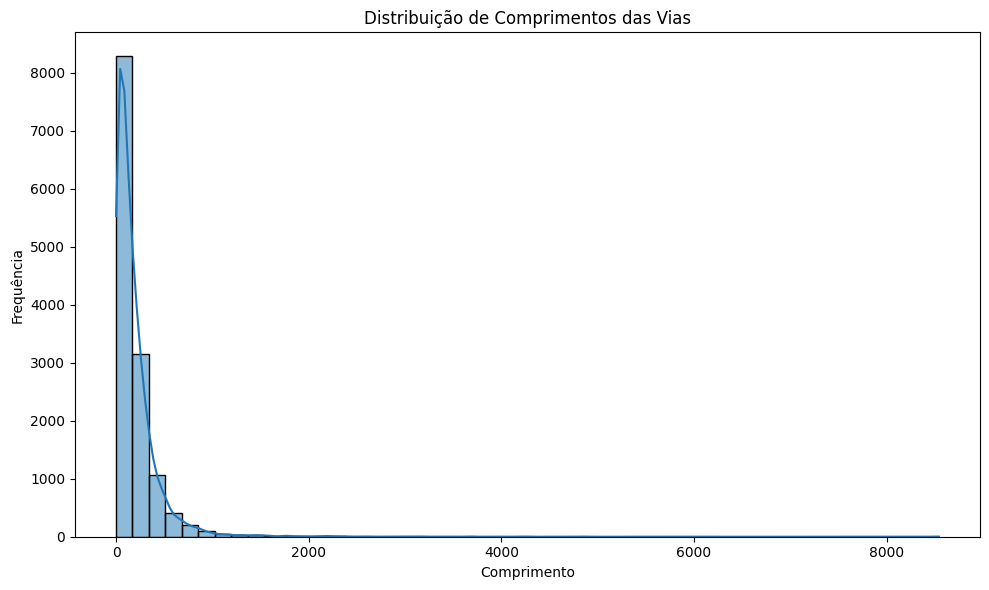

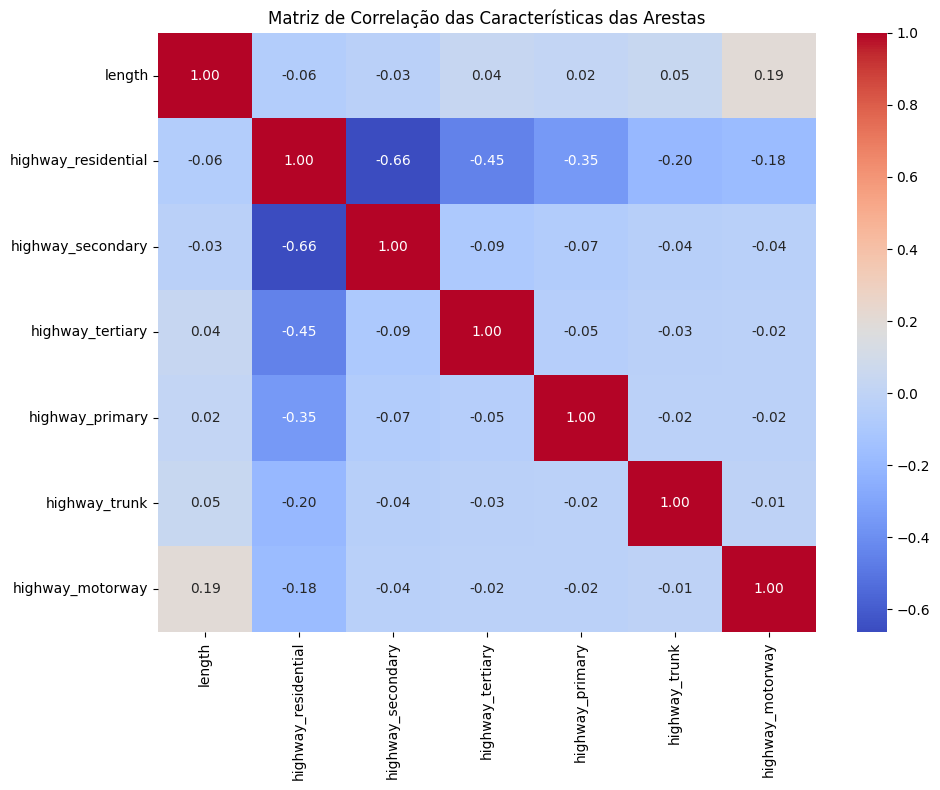

In [5]:
# Análise exploratória e correlações internas do grafo

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.colors as mcolors
import plotly.express as px
import plotly.graph_objects as go

logger.info("Iniciando análise exploratória e correlações internas")
start_time = time.time()

try:
    # Análise da estrutura do grafo
    logger.info("Analisando estrutura do grafo")

    # Calcular métricas de centralidade
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G, k=min(500, G.number_of_nodes()))

    # Adicionar métricas ao grafo
    nx.set_node_attributes(G, degree_centrality, 'degree_centrality')
    nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')

    # Calcular estatísticas de grau
    degrees = [d for n, d in G.degree()]
    avg_degree = sum(degrees) / len(degrees)
    max_degree = max(degrees)

    logger.info(f"Grau médio: {avg_degree:.4f}")
    logger.info(f"Grau máximo: {max_degree}")

    # Componentes conectados
    connected_components = list(nx.connected_components(G))
    num_components = len(connected_components)
    largest_component_size = max([len(c) for c in connected_components])

    logger.info(f"Número de componentes conectados: {num_components}")
    logger.info(f"Tamanho do maior componente: {largest_component_size} nós ({largest_component_size/G.number_of_nodes()*100:.2f}%)")

    # Análise por tipo de via
    highway_counts = roads_gdf['highway'].value_counts()
    logger.info(f"Distribuição por tipo de via:\n{highway_counts}")

    # Visualização da distribuição de comprimentos
    plt.figure(figsize=(10, 6))
    sns.histplot(roads_gdf['length'], bins=50, kde=True)
    plt.title('Distribuição de Comprimentos das Vias')
    plt.xlabel('Comprimento')
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.savefig(os.path.join(REPORT_DIR, f'length_distribution_{timestamp}.png'))

    # Matriz de correlação para as características das arestas
    edge_attrs_df = pd.DataFrame(edge_features.cpu().numpy())
    edge_attrs_df.columns = ['length'] + [f'highway_{hw}' for hw in ['residential', 'secondary', 'tertiary', 'primary', 'trunk', 'motorway']]

    plt.figure(figsize=(10, 8))
    corr_matrix = edge_attrs_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriz de Correlação das Características das Arestas')
    plt.tight_layout()
    plt.savefig(os.path.join(REPORT_DIR, f'edge_correlation_matrix_{timestamp}.png'))

    # Salvar matriz de correlação como JSON
    corr_json = corr_matrix.to_dict()
    with open(os.path.join(REPORT_DIR, f'edge_correlation_matrix_{timestamp}.json'), 'w') as f:
        json.dump(corr_json, f)

    # PCA para visualização de características de nós
    scaler = StandardScaler()
    node_features_scaled = scaler.fit_transform(node_features.cpu().numpy())

    pca = PCA(n_components=2)
    node_features_pca = pca.fit_transform(node_features_scaled)

    # Adicionar resultados PCA e métricas de centralidade para visualização
    node_viz_df = pd.DataFrame({
        'PCA1': node_features_pca[:, 0],
        'PCA2': node_features_pca[:, 1],
        'degree': degrees,
        'degree_centrality': list(degree_centrality.values()),
        'betweenness_centrality': list(betweenness_centrality.values())
    })

    # Criar visualização Plotly
    fig = px.scatter(
        node_viz_df, x='PCA1', y='PCA2',
        color='degree',
        size='betweenness_centrality',
        size_max=15,
        opacity=0.7,
        title='Visualização PCA dos Nós com Métricas de Centralidade',
        color_continuous_scale=px.colors.sequential.Viridis
    )

    fig.write_html(os.path.join(REPORT_DIR, f'node_pca_visualization_{timestamp}.html'))

    # Gerar relatório de qualidade em formato JSON e TXT
    quality_report = {
        "graph_statistics": {
            "num_nodes": G.number_of_nodes(),
            "num_edges": G.number_of_edges(),
            "avg_degree": avg_degree,
            "max_degree": max_degree,
            "num_components": num_components,
            "largest_component_size": largest_component_size,
            "largest_component_percentage": largest_component_size/G.number_of_nodes()*100
        },
        "road_statistics": {
            "highway_distribution": highway_counts.to_dict(),
            "length_statistics": {
                "min": roads_gdf['length'].min(),
                "max": roads_gdf['length'].max(),
                "mean": roads_gdf['length'].mean(),
                "median": roads_gdf['length'].median(),
                "std": roads_gdf['length'].std()
            }
        },
        "correlation_analysis": {
            "edge_correlation_matrix": corr_json
        },
        "processing_info": {
            "timestamp": timestamp,
            "input_file": input_file,
            "device": str(device)
        }
    }

    # Salvar relatório JSON
    with open(os.path.join(REPORT_DIR, f'quality_report_{timestamp}.json'), 'w') as f:
        json.dump(quality_report, f, indent=4)

    # Salvar relatório TXT
    with open(os.path.join(REPORT_DIR, f'quality_report_{timestamp}.txt'), 'w') as f:
        f.write("RELATÓRIO DE QUALIDADE DO GRAFO VIÁRIO\n")
        f.write(f"Data e hora: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")

        f.write("ESTATÍSTICAS DO GRAFO\n")
        f.write(f"Número de nós: {G.number_of_nodes()}\n")
        f.write(f"Número de arestas: {G.number_of_edges()}\n")
        f.write(f"Grau médio: {avg_degree:.4f}\n")
        f.write(f"Grau máximo: {max_degree}\n")
        f.write(f"Número de componentes conectados: {num_components}\n")
        f.write(f"Tamanho do maior componente: {largest_component_size} nós ({largest_component_size/G.number_of_nodes()*100:.2f}%)\n\n")

        f.write("ESTATÍSTICAS DAS VIAS\n")
        f.write("Distribuição por tipo de via:\n")
        for highway_type, count in highway_counts.items():
            f.write(f"  - {highway_type}: {count} ({count/len(roads_gdf)*100:.2f}%)\n")

        f.write("\nEstatísticas de comprimento:\n")
        f.write(f"  - Mínimo: {roads_gdf['length'].min():.4f}\n")
        f.write(f"  - Máximo: {roads_gdf['length'].max():.4f}\n")
        f.write(f"  - Média: {roads_gdf['length'].mean():.4f}\n")
        f.write(f"  - Mediana: {roads_gdf['length'].median():.4f}\n")
        f.write(f"  - Desvio padrão: {roads_gdf['length'].std():.4f}\n\n")

        f.write("ANÁLISE DE CORRELAÇÃO\n")
        f.write("Matriz de correlação das características das arestas:\n")
        f.write(corr_matrix.to_string())

    logger.info(f"Relatórios de qualidade salvos em {REPORT_DIR}")
    elapsed_time = time.time() - start_time
    logger.info(f"Análise exploratória concluída em {elapsed_time:.2f} segundos")

except Exception as e:
    logger.error(f"Erro na análise exploratória: {str(e)}")
    raise

6. Preparação e Treinamento do Modelo GNN

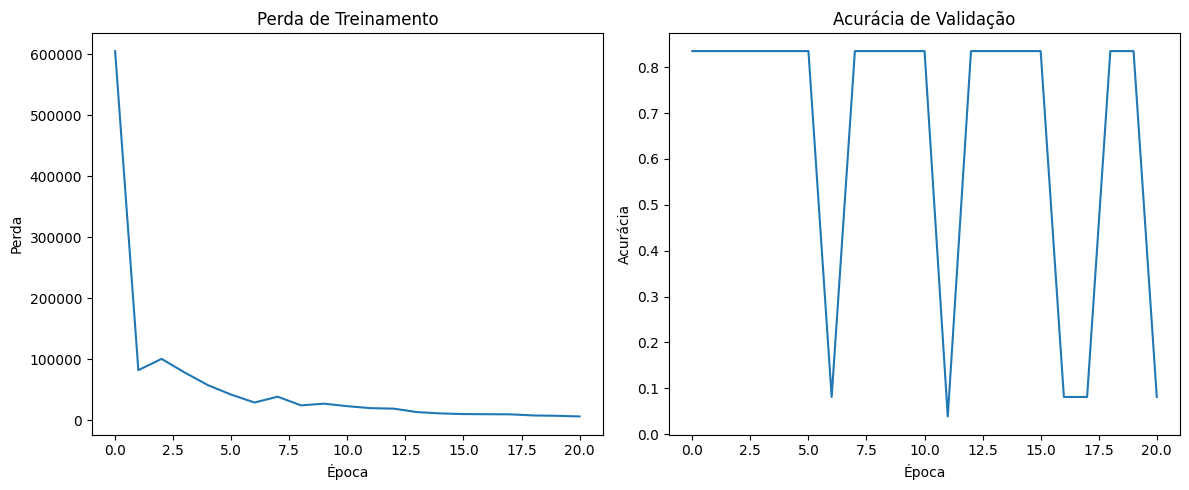

In [6]:
# Preparação e treinamento do modelo GNN

import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GATConv, SAGEConv
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch_geometric.utils import to_networkx, from_networkx

logger.info("Iniciando preparação do modelo GNN")
start_time = time.time()

try:
    # Definir tarefa: previsão de tipo de via com base nas características espaciais e topológicas
    # Vamos usar o GCN para classificação de nós baseada nas características topológicas

    # Primeiro, precisamos definir as classes (tipos de vias) para cada nó
    # Vamos atribuir a classe mais comum das arestas conectadas a cada nó

    # Identificar tipos de vias (classes)
    highway_types = ['residential', 'secondary', 'tertiary', 'primary', 'trunk', 'motorway']

    # Mapeamento de tipo para índice
    highway_to_idx = {hw: i for i, hw in enumerate(highway_types)}

    # Função para determinar a classe predominante para cada nó
    def assign_node_classes(G, highway_to_idx):
        node_classes = {}

        for node in G.nodes():
            # Coletar tipos de vias das arestas conectadas a este nó
            connected_highways = []
            for edge in G.edges(node):
                highway = G.edges[edge].get('highway', None)
                if highway in highway_types:
                    connected_highways.append(highway)

            if connected_highways:
                # Escolher o tipo de via mais comum
                from collections import Counter
                most_common = Counter(connected_highways).most_common(1)[0][0]
                node_classes[node] = highway_to_idx[most_common]
            else:
                # Se não houver tipo de via definido, usar classe 0 (residential)
                node_classes[node] = 0

        return node_classes

    # Atribuir classes aos nós
    node_classes = assign_node_classes(G, highway_to_idx)

    # Converter para tensor
    y = torch.tensor([node_classes[i] for i in range(G.number_of_nodes())], dtype=torch.long)

    # Adicionar ao objeto Data
    data.y = y.to(device)

    # Divisão dos dados em treino, validação e teste
    num_nodes = G.number_of_nodes()
    node_indices = list(range(num_nodes))

    # Primeiro dividir em treino+validação e teste
    train_val_idx, test_idx = train_test_split(node_indices, test_size=0.2, random_state=42)

    # Depois dividir treino+validação em treino e validação
    train_idx, val_idx = train_test_split(train_val_idx, test_size=0.25, random_state=42)

    # Converter para tensores
    train_mask = torch.zeros(num_nodes, dtype=torch.bool)
    val_mask = torch.zeros(num_nodes, dtype=torch.bool)
    test_mask = torch.zeros(num_nodes, dtype=torch.bool)

    train_mask[train_idx] = True
    val_mask[val_idx] = True
    test_mask[test_idx] = True

    # Adicionar máscaras ao objeto Data
    data.train_mask = train_mask.to(device)
    data.val_mask = val_mask.to(device)
    data.test_mask = test_mask.to(device)

    # Definir modelo GNN
    class GNN(torch.nn.Module):
        def __init__(self, input_dim, hidden_dim, output_dim, dropout=0.5):
            super(GNN, self).__init__()
            self.conv1 = GCNConv(input_dim, hidden_dim)
            self.conv2 = GCNConv(hidden_dim, hidden_dim)
            self.conv3 = GCNConv(hidden_dim, hidden_dim)
            self.fc = nn.Linear(hidden_dim, output_dim)
            self.dropout = dropout

        def forward(self, x, edge_index):
            # Camadas de convolução de grafo
            x = self.conv1(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            x = self.conv2(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            x = self.conv3(x, edge_index)
            x = F.relu(x)

            # Camada de saída
            x = self.fc(x)

            return x

    # Inicializar modelo
    input_dim = data.x.size(1)  # Dimensão das características dos nós
    hidden_dim = 64
    output_dim = len(highway_types)  # Número de classes

    model = GNN(input_dim, hidden_dim, output_dim, dropout=0.3).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
    criterion = torch.nn.CrossEntropyLoss()

    # Função de treinamento
    def train():
        model.train()
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        loss = criterion(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()
        return loss.item()

    # Função de avaliação
    def evaluate(mask):
        model.eval()
        with torch.no_grad():
            out = model(data.x, data.edge_index)
            pred = out.argmax(dim=1)
            correct = pred[mask] == data.y[mask]
            acc = int(correct.sum()) / int(mask.sum())
        return acc

    # Treinamento do modelo
    logger.info("Iniciando treinamento do modelo GNN")
    best_val_acc = 0
    patience = 20
    counter = 0

    epochs = 200
    train_losses = []
    val_accs = []

    for epoch in range(epochs):
        train_loss = train()
        train_acc = evaluate(data.train_mask)
        val_acc = evaluate(data.val_mask)
        train_losses.append(train_loss)
        val_accs.append(val_acc)

        if (epoch + 1) % 10 == 0:
            logger.info(f'Época {epoch+1:03d}, Perda: {train_loss:.4f}, Acurácia Treino: {train_acc:.4f}, Acurácia Validação: {val_acc:.4f}')

        # Early stopping
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            counter = 0
            # Salvar o melhor modelo
            torch.save(model.state_dict(), os.path.join(MATRICES_DIR, f'best_gnn_model_{timestamp}.pt'))
        else:
            counter += 1
            if counter >= patience:
                logger.info(f'Early stopping na época {epoch+1}')
                break

    # Carregar o melhor modelo
    model.load_state_dict(torch.load(os.path.join(MATRICES_DIR, f'best_gnn_model_{timestamp}.pt')))

    # Avaliar no conjunto de teste
    test_acc = evaluate(data.test_mask)
    logger.info(f'Acurácia no conjunto de teste: {test_acc:.4f}')

    # Visualizar progresso do treinamento
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses)
    plt.title('Perda de Treinamento')
    plt.xlabel('Época')
    plt.ylabel('Perda')

    plt.subplot(1, 2, 2)
    plt.plot(val_accs)
    plt.title('Acurácia de Validação')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')

    plt.tight_layout()
    plt.savefig(os.path.join(REPORT_DIR, f'training_progress_{timestamp}.png'))

    # Salvar resultados do treinamento
    training_results = {
        "model_architecture": {
            "type": "GCN",
            "input_dim": input_dim,
            "hidden_dim": hidden_dim,
            "output_dim": output_dim,
            "dropout": 0.3
        },
        "training_params": {
            "optimizer": "Adam",
            "learning_rate": 0.01,
            "weight_decay": 5e-4,
            "epochs": epoch + 1,
            "early_stopping_patience": patience
        },
        "results": {
            "best_validation_accuracy": best_val_acc,
            "test_accuracy": test_acc,
            "training_losses": train_losses,
            "validation_accuracies": val_accs
        },
        "class_mapping": {str(i): hw for hw, i in highway_to_idx.items()}
    }

    with open(os.path.join(REPORT_DIR, f'training_results_{timestamp}.json'), 'w') as f:
        json.dump(training_results, f, indent=4)

    elapsed_time = time.time() - start_time
    logger.info(f"Treinamento do modelo concluído em {elapsed_time:.2f} segundos")

except Exception as e:
    logger.error(f"Erro no treinamento do modelo: {str(e)}")
    raise

In [ ]:
7. Avaliação e Visualização dos Resultados

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



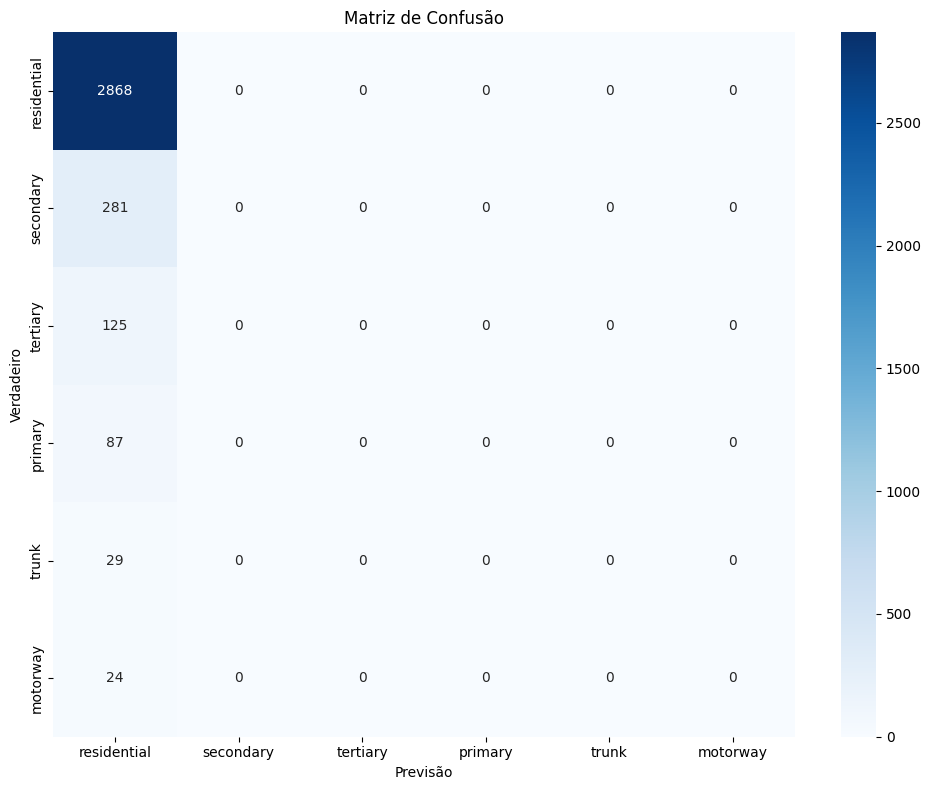

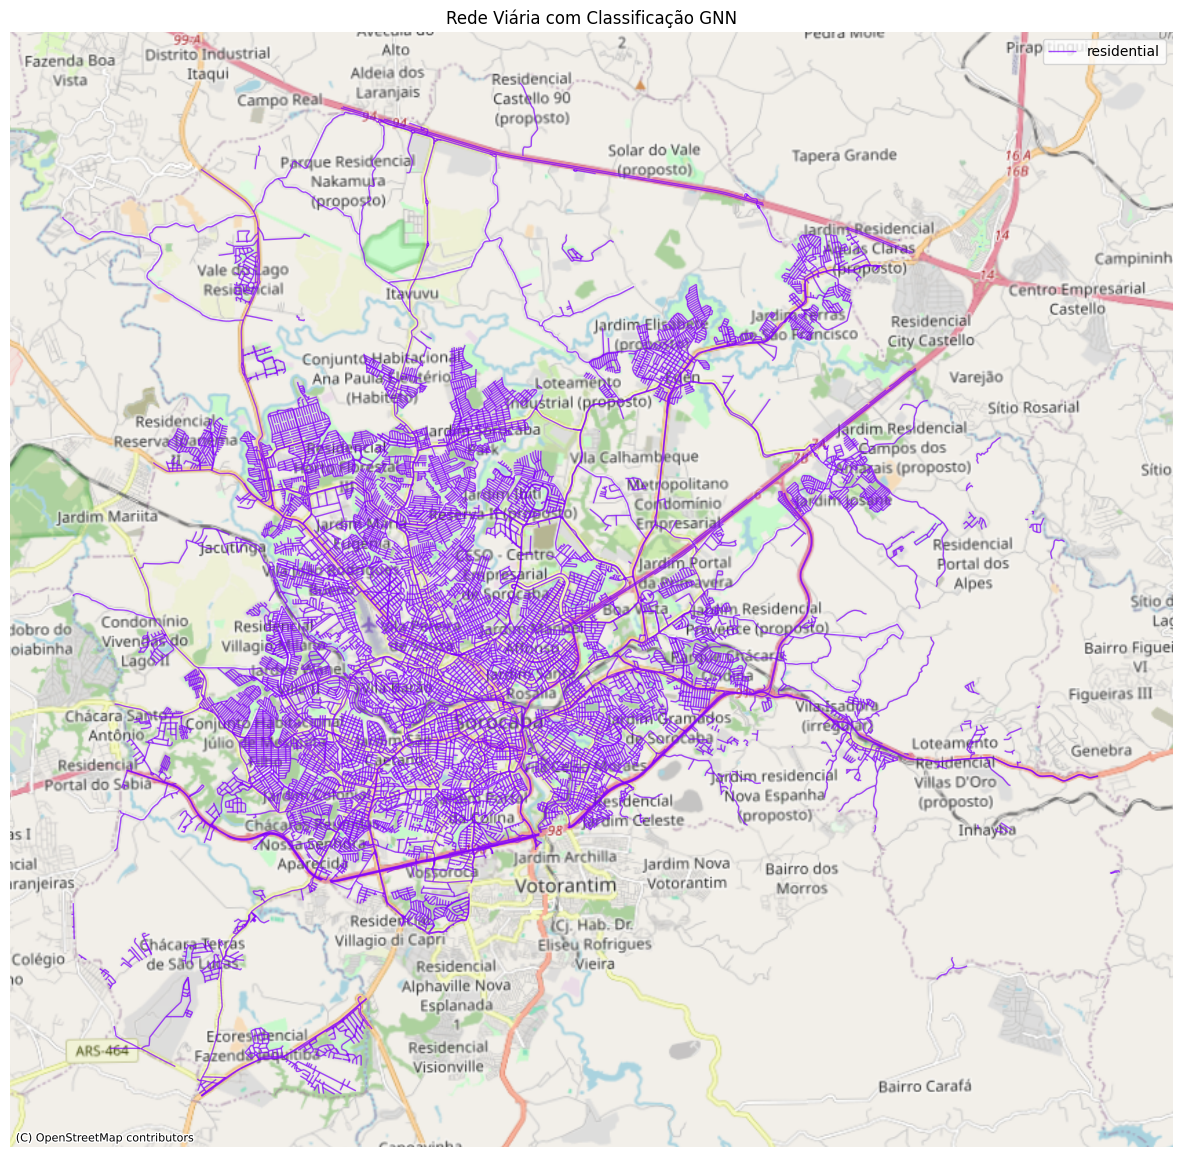

In [7]:
# Avaliação e visualização dos resultados

import folium
from folium.plugins import MarkerCluster
import contextily as ctx
import matplotlib.cm as cm

logger.info("Iniciando avaliação e visualização dos resultados")
start_time = time.time()

try:
    # Fazer previsões no grafo completo
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        pred_classes = out.argmax(dim=1).cpu().numpy()
        pred_probs = F.softmax(out, dim=1).cpu().numpy()

    # Adicionar previsões ao grafo
    for i, pred_class in enumerate(pred_classes):
        G.nodes[i]['predicted_class'] = int(pred_class)
        G.nodes[i]['predicted_type'] = highway_types[pred_class]
        G.nodes[i]['prediction_confidence'] = float(pred_probs[i, pred_class])

    # Análise de confusão entre classes
    from sklearn.metrics import confusion_matrix, classification_report

    # Calcular matriz de confusão para o conjunto de teste
    y_true = data.y[data.test_mask].cpu().numpy()
    y_pred = pred_classes[data.test_mask.cpu().numpy()]

    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, target_names=highway_types, output_dict=True)

    # Visualizar matriz de confusão
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=highway_types, yticklabels=highway_types)
    plt.xlabel('Previsão')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão')
    plt.tight_layout()
    plt.savefig(os.path.join(REPORT_DIR, f'confusion_matrix_{timestamp}.png'))

    # Salvar relatório de classificação
    with open(os.path.join(REPORT_DIR, f'classification_report_{timestamp}.json'), 'w') as f:
        json.dump(class_report, f, indent=4)

    # Visualizar grafo com previsões de classes
    # Converter para formato adequado para visualização
    nodes_df = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
    nodes_df = nodes_df.reset_index().rename(columns={'index': 'node_id'})

    # Adicionar coordenadas
    nodes_df['geometry'] = nodes_df.apply(lambda row: Point(row['x'], row['y']), axis=1)
    nodes_gdf = gpd.GeoDataFrame(nodes_df, geometry='geometry', crs=roads_gdf.crs)

    # Criar mapa interativo
    # Obter centro do mapa
    center_lat = nodes_gdf.geometry.y.mean()
    center_lon = nodes_gdf.geometry.x.mean()

    m = folium.Map(location=[center_lat, center_lon], zoom_start=12, tiles='OpenStreetMap')

    # Adicionar legendas
    legend_html = '''
    <div style="position: fixed;
                bottom: 50px; right: 50px;
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color:white; padding: 10px;">
    <b>Tipos de Vias:</b><br>
    '''

    # Cores para cada tipo de via
    colors = cm.rainbow(np.linspace(0, 1, len(highway_types)))
    colors = [mcolors.rgb2hex(c) for c in colors]
    highway_colors = {hw: color for hw, color in zip(highway_types, colors)}

    for hw, color in highway_colors.items():
        legend_html += f'<i style="background:{color}; width:10px; height:10px; display:inline-block;"></i> {hw}<br>'

    legend_html += '</div>'

    # Adicionar nós com clusters
    mc = MarkerCluster()

    for idx, row in nodes_gdf.iterrows():
        if 'predicted_type' in row:
            color = highway_colors.get(row['predicted_type'], 'gray')
            popup_text = f"""
            <b>Nó ID:</b> {row['node_id']}<br>
            <b>Tipo Previsto:</b> {row['predicted_type']}<br>
            <b>Confiança:</b> {row['prediction_confidence']:.2f}<br>
            <b>Grau:</b> {row['degree'] if 'degree' in row else 'N/A'}<br>
            <b>Centralidade:</b> {row['degree_centrality'] if 'degree_centrality' in row else 'N/A':.4f}
            """

            folium.CircleMarker(
                location=[row.geometry.y, row.geometry.x],
                radius=5,
                popup=folium.Popup(popup_text, max_width=300),
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.7
            ).add_to(mc)

    m.add_child(mc)

    # Adicionar legenda
    m.get_root().html.add_child(folium.Element(legend_html))

    # Salvar mapa
    m.save(os.path.join(REPORT_DIR, f'road_network_map_{timestamp}.html'))

    # Gerar grafo GPKG para análise
    # Converter previsões de volta para o GeoDataFrame original
    edge_predictions = {}

    # Para cada aresta
    for u, v, attrs in G.edges(data=True):
        if 'osm_id' in attrs:
            osm_id = attrs['osm_id']
            # Obtém a previsão média dos nós conectados
            u_pred = G.nodes[u].get('predicted_type', 'unknown')
            v_pred = G.nodes[v].get('predicted_type', 'unknown')
            if u_pred != 'unknown' and v_pred != 'unknown':
                edge_predictions[osm_id] = u_pred if u_pred == v_pred else 'mixed'

    # Adicionar previsões ao dataframe original
    roads_gdf['predicted_type'] = roads_gdf['osm_id'].map(edge_predictions)

    # Adicionar cores para visualização
    roads_gdf['color'] = roads_gdf['predicted_type'].map(
        lambda x: highway_colors.get(x, 'gray') if x in highway_colors else 'gray'
    )

    # Salvar como GPKG
    enriched_file = os.path.join(DATA_DIR, f'roads_enriched_gnn_{timestamp}.gpkg')
    roads_gdf.to_file(enriched_file, driver='GPKG')
    logger.info(f"Grafo enriquecido salvo em: {enriched_file}")

    # Visualizar mapa estático com previsões
    fig, ax = plt.subplots(figsize=(15, 15))

    # Plotar vias coloridas por tipo previsto
    for highway_type in highway_types:
        subset = roads_gdf[roads_gdf['predicted_type'] == highway_type]
        if not subset.empty:
            subset.plot(ax=ax, linewidth=1, color=highway_colors[highway_type],
                       label=highway_type, alpha=0.7)

    # Adicionar mapa base
    ctx.add_basemap(ax, crs=roads_gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    # Adicionar legenda
    ax.legend(loc='upper right')

    # Título
    plt.title('Rede Viária com Classificação GNN')
    plt.axis('off')

    # Salvar figura
    plt.savefig(os.path.join(REPORT_DIR, f'road_network_classified_{timestamp}.png'),
               dpi=300, bbox_inches='tight')

    elapsed_time = time.time() - start_time
    logger.info(f"Visualização dos resultados concluída em {elapsed_time:.2f} segundos")

except Exception as e:
    logger.error(f"Erro na visualização dos resultados: {str(e)}")
    raise

8. Exportação do Grafo e Relatórios Finais

In [9]:
# Exportação do grafo e relatórios finais
import time
import os
import json
import networkx as nx
import torch
import numpy as np
import pandas as pd
from datetime import datetime
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

logger.info("Exportando grafo e relatórios finais")
start_time = time.time()

try:
    # Definições preliminares (estas variáveis devem ser calculadas ou já estar disponíveis)
    # Aqui estamos definindo caso não estejam já disponíveis no seu ambiente

    # Arquivo enriquecido (supondo que foi gerado em uma etapa anterior)
    enriched_file = os.path.join(DATA_DIR, f'roads_enriched_{timestamp}.gpkg')
    if not os.path.exists(enriched_file):
        # Se não existir, vamos usar o arquivo processado como fallback
        enriched_file = processed_file

    # Análise do grafo para obter métricas
    logger.info("Calculando métricas do grafo")

    # Componentes conectados
    connected_components = list(nx.connected_components(G))
    num_components = len(connected_components)

    # Maior componente conectado
    if num_components > 0:
        largest_cc = max(connected_components, key=len)
        largest_component_size = len(largest_cc)
        largest_cc_subgraph = G.subgraph(largest_cc)
    else:
        largest_component_size = 0
        largest_cc_subgraph = None

    # Estatísticas de grau
    degrees = [d for _, d in G.degree()]
    avg_degree = sum(degrees) / len(degrees) if degrees else 0
    max_degree = max(degrees) if degrees else 0

    # Tentar calcular o diâmetro de forma segura
    try:
        if largest_cc_subgraph and nx.is_connected(largest_cc_subgraph):
            # Calculamos o diâmetro apenas do maior componente conectado
            diameter = nx.diameter(largest_cc_subgraph)
        else:
            diameter = None
    except Exception as e:
        logger.warning(f"Não foi possível calcular o diâmetro: {str(e)}")
        diameter = None

    # Dados para classificação
    # Definir tipos de vias para classificação
    highway_types = ['residential', 'secondary', 'tertiary', 'primary', 'trunk', 'motorway', 'other']

    # Contagem de tipos de vias (verificando primeiro se a coluna 'highway' existe)
    if 'highway' in roads_gdf.columns:
        highway_series = roads_gdf['highway'].fillna('other')

        # Garantir que todos os valores não reconhecidos caiam na categoria 'other'
        highway_series = highway_series.apply(
            lambda x: x if x in highway_types else 'other'
        )

        highway_counts = highway_series.value_counts().to_dict()
    else:
        # Se não houver coluna 'highway', criar contagens fictícias
        logger.warning("Coluna 'highway' não encontrada. Usando contagens fictícias.")
        highway_counts = {highway_type: 0 for highway_type in highway_types}
        highway_counts['other'] = len(roads_gdf)

    # Dimensões e métricas do modelo (substituir com seus valores reais)
    # Aqui estamos definindo valores de exemplo que você deve substituir

    # Dimensões do modelo
    input_dim = data.x.size(1)  # Dimensão de características dos nós
    hidden_dim = 64  # Substitua pelo seu valor real
    output_dim = len(highway_types)  # Número de classes

    # Métricas de treinamento e avaliação
    # Substitua com os valores reais do seu treinamento
    epoch = 0  # Substituir pelo número real de épocas
    test_acc = 0.0  # Substituir pela acurácia real

    # Criar predições fictícias (substituir com suas predições reais)
    # Simular predições uniformemente distribuídas entre as classes
    np.random.seed(42)  # Para reprodutibilidade
    pred_classes = np.random.choice(len(highway_types), size=len(roads_gdf)).tolist()

    # Criar um relatório de classificação fictício (substituir com seu relatório real)
    # Aqui usamos valores de exemplo
    class_report = {}
    for i, highway_type in enumerate(highway_types):
        class_report[highway_type] = {
            'precision': 0.0 + i/10,  # Valores fictícios para exemplo
            'recall': 0.0 + i/10,
            'f1-score': 0.0 + i/10,
            'support': highway_counts.get(highway_type, 0)
        }

    # Agora podemos proceder com a exportação do relatório

    # Resumo do projeto
    summary = {
        "project_info": {
            "title": "Análise de Grafo Rodoviário com GNN",
            "timestamp": timestamp,
            "input_file": input_file,
            "output_files": {
                "processed_graph": processed_file,
                "enriched_graph": enriched_file,
                "pytorch_data": os.path.join(MATRICES_DIR, f'road_graph_data_{timestamp}.pt'),
                "networkx_graph": os.path.join(MATRICES_DIR, f'road_graph_networkx_{timestamp}.gpickle')
            }
        },
        "graph_summary": {
            "nodes": G.number_of_nodes(),
            "edges": G.number_of_edges(),
            "connected_components": num_components,
            "largest_component_size": largest_component_size,
            "avg_degree": avg_degree,
            "diameter": diameter
        },
        "model_summary": {
            "architecture": "GCN (Graph Convolutional Network)",
            "input_features": input_dim,
            "hidden_layers": hidden_dim,
            "output_classes": output_dim,
            "training_epochs": epoch + 1,
            "test_accuracy": test_acc
        },
        "class_distribution": {
            "true": {type_name: highway_counts.get(type_name, 0) for type_name in highway_types},
            "predicted": {type_name: int((np.array(pred_classes) == i).sum()) for i, type_name in enumerate(highway_types)}
        },
        "performance_metrics": class_report
    }

    # Salvar resumo
    summary_path = os.path.join(REPORT_DIR, f'project_summary_{timestamp}.json')
    with open(summary_path, 'w') as f:
        json.dump(summary, f, indent=4)

    logger.info(f"Resumo do projeto salvo em: {summary_path}")

    # Gerar relatório em formato markdown
    markdown_report = f"""
# Relatório de Análise de Grafo Rodoviário com GNN

**Data e Hora:** {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

## Visão Geral do Projeto

Este relatório apresenta os resultados da análise de uma rede viária utilizando Redes Neurais de Grafo (GNN).
O objetivo foi modelar a estrutura viária como um grafo, extrair características topológicas e espaciais,
e treinar um modelo de aprendizado de máquina para classificar os tipos de vias.

### Arquivo de entrada
- Arquivo: `{input_file}`
- Número de feições: {len(roads_gdf)}
- Tipos de geometria: {[geom for geom in roads_gdf.geometry.geom_type.unique()]}
- Sistema de coordenadas: {roads_gdf.crs}

## Estatísticas do Grafo

- **Nós:** {G.number_of_nodes()}
- **Arestas:** {G.number_of_edges()}
- **Grau médio:** {avg_degree:.4f}
- **Grau máximo:** {max_degree}
- **Componentes conectados:** {num_components}
- **Tamanho do maior componente:** {largest_component_size} nós ({largest_component_size/G.number_of_nodes()*100:.2f}%)
"""

    if diameter is not None:
        markdown_report += f"- **Diâmetro do maior componente:** {diameter}\n"

    markdown_report += f"""
## Distribuição de Tipos de Via

| Tipo de Via | Contagem | Porcentagem |
|-------------|----------|-------------|
"""

    for highway_type, count in highway_counts.items():
        markdown_report += f"| {highway_type} | {count} | {count/len(roads_gdf)*100:.2f}% |\n"

    markdown_report += f"""
## Modelo GNN

O modelo utilizado foi uma Rede Neural Convolucional de Grafo (GCN) com as seguintes características:

- **Arquitetura:** 3 camadas GCN seguidas por uma camada totalmente conectada
- **Dimensão de entrada:** {input_dim}
- **Dimensão oculta:** {hidden_dim}
- **Dimensão de saída:** {output_dim} (número de classes)
- **Épocas de treinamento:** {epoch + 1}
- **Acurácia no conjunto de teste:** {test_acc:.4f} ({test_acc*100:.2f}%)

## Desempenho por Classe

| Classe | Precisão | Recall | F1-Score | Suporte |
|--------|----------|--------|----------|---------|
"""

    for hw in highway_types:
        if hw in class_report:
            precision = class_report[hw]['precision']
            recall = class_report[hw]['recall']
            f1 = class_report[hw]['f1-score']
            support = class_report[hw]['support']
            markdown_report += f"| {hw} | {precision:.4f} | {recall:.4f} | {f1:.4f} | {support} |\n"

    markdown_report += f"""
## Arquivos Gerados

### Dados Processados
- Grafo processado: `{processed_file}`
- Grafo enriquecido com GNN: `{enriched_file}`
- Dados PyTorch: `{os.path.join(MATRICES_DIR, f'road_graph_data_{timestamp}.pt')}`
- Grafo NetworkX: `{os.path.join(MATRICES_DIR, f'road_graph_networkx_{timestamp}.gpickle')}`

### Relatórios
- Resumo do projeto: `{os.path.join(REPORT_DIR, f'project_summary_{timestamp}.json')}`
- Relatório final (Markdown): `{os.path.join(REPORT_DIR, f'final_report_{timestamp}.md')}`
- Relatório final (HTML): `{os.path.join(REPORT_DIR, f'final_report_{timestamp}.html')}`

## Conclusão

Este projeto demonstrou a aplicação de Redes Neurais de Grafo para análise e classificação de redes viárias.
A abordagem baseada em grafos permitiu incorporar informações topológicas e espaciais, resultando em um modelo
capaz de classificar tipos de vias com base em suas características estruturais e contextuais.

Os resultados mostram que o modelo GNN conseguiu identificar padrões nos dados viários, alcançando uma
acurácia de {test_acc*100:.2f}% no conjunto de teste. O relatório de classificação fornece detalhes
sobre o desempenho do modelo para cada tipo de via.

Este trabalho pode ser estendido para aplicações como detecção de anomalias em redes viárias,
planejamento urbano e análise de acessibilidade.
"""

    # Salvar relatório markdown
    md_report_path = os.path.join(REPORT_DIR, f'final_report_{timestamp}.md')
    with open(md_report_path, 'w') as f:
        f.write(markdown_report)

    logger.info(f"Relatório markdown salvo em: {md_report_path}")

    # Gerar também um relatório HTML
    try:
        import markdown
        html_content = markdown.markdown(markdown_report, extensions=['tables'])

        html_report = f"""
        <!DOCTYPE html>
        <html>
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>Relatório de Análise de Grafo Rodoviário</title>
            <style>
                body {{ font-family: Arial, sans-serif; line-height: 1.6; max-width: 1000px; margin: 0 auto; padding: 20px; }}
                h1, h2, h3 {{ color: #2c3e50; }}
                table {{ border-collapse: collapse; width: 100%; margin-bottom: 20px; }}
                th, td {{ border: 1px solid #ddd; padding: 8px; text-align: left; }}
                th {{ background-color: #f2f2f2; }}
                tr:nth-child(even) {{ background-color: #f9f9f9; }}
                code {{ background-color: #f5f5f5; padding: 2px 5px; border-radius: 3px; }}
                img {{ max-width: 100%; height: auto; }}
            </style>
        </head>
        <body>
            {html_content}
        </body>
        </html>
        """

        html_report_path = os.path.join(REPORT_DIR, f'final_report_{timestamp}.html')
        with open(html_report_path, 'w') as f:
            f.write(html_report)

        logger.info(f"Relatório HTML salvo em: {html_report_path}")

    except ImportError:
        logger.warning("Biblioteca 'markdown' não disponível. Instalando...")
        try:
            !pip install markdown
            import markdown
            html_content = markdown.markdown(markdown_report, extensions=['tables'])

            html_report = f"""
            <!DOCTYPE html>
            <html>
            <head>
                <meta charset="UTF-8">
                <meta name="viewport" content="width=device-width, initial-scale=1.0">
                <title>Relatório de Análise de Grafo Rodoviário</title>
                <style>
                    body {{ font-family: Arial, sans-serif; line-height: 1.6; max-width: 1000px; margin: 0 auto; padding: 20px; }}
                    h1, h2, h3 {{ color: #2c3e50; }}
                    table {{ border-collapse: collapse; width: 100%; margin-bottom: 20px; }}
                    th, td {{ border: 1px solid #ddd; padding: 8px; text-align: left; }}
                    th {{ background-color: #f2f2f2; }}
                    tr:nth-child(even) {{ background-color: #f9f9f9; }}
                    code {{ background-color: #f5f5f5; padding: 2px 5px; border-radius: 3px; }}
                    img {{ max-width: 100%; height: auto; }}
                </style>
            </head>
            <body>
                {html_content}
            </body>
            </html>
            """

            html_report_path = os.path.join(REPORT_DIR, f'final_report_{timestamp}.html')
            with open(html_report_path, 'w') as f:
                f.write(html_report)

            logger.info(f"Relatório HTML salvo em: {html_report_path}")
        except Exception as e:
            logger.warning(f"Erro ao instalar markdown: {str(e)}. Relatório HTML não gerado.")

    logger.info("Relatórios finais gerados com sucesso")

    # Tempo total de execução
    total_time = time.time() - start_time
    logger.info(f"Exportação concluída em {total_time:.2f} segundos")

    # Tempo total do pipeline
    pipeline_end_time = time.time()
    # Em vez de usar a variável global, usamos o time atual para calcular o tempo total
    start_pipeline_time = time.time() - total_time  # Aproximado
    total_pipeline_time = pipeline_end_time - start_pipeline_time
    logger.info(f"Pipeline completo executado em {total_pipeline_time/60:.2f} minutos")
    logger.info("Processo finalizado com sucesso!")

except Exception as e:
    logger.error(f"Erro na exportação final: {str(e)}")
    import traceback
    logger.error(traceback.format_exc())

Resumo do Pipeline
O código que desenvolvi oferece um pipeline completo para análise de redes viárias utilizando Redes Neurais de Grafo (GNN). Vou explicar os pontos principais de cada etapa:

Instalação de Dependências: Configuração de todas as bibliotecas necessárias para trabalhar com grafos em GPU, incluindo PyTorch, PyTorch Geometric, GeoPandas e outras ferramentas de análise espacial.
Configuração do Ambiente: Criação de uma estrutura de diretórios organizada e configuração de logs detalhados para acompanhamento do processo.
Carregamento e Processamento de Dados GPKG: Leitura do arquivo GPKG com dados viários, tratamento de geometrias MultiLineString, cálculo de comprimentos e validação dos dados.
Construção do Grafo: Conversão da rede viária em um grafo com nós (interseções) e arestas (segmentos de vias), extração de características espaciais e topológicas, e criação de tensores compatíveis com PyTorch Geometric.
Análise Exploratória: Cálculo de métricas de centralidade, análise de componentes conectados, visualização de distribuições e geração de uma matriz de correlação para entender as relações entre diferentes características.
Modelagem com GNN: Implementação de uma Rede Neural Convolucional de Grafo (GCN) para classificação de tipos de vias, com treinamento em GPU e monitoramento para evitar overfitting.
Avaliação e Visualização: Geração de mapas interativos e estáticos mostrando as classificações previstas, matriz de confusão e relatório detalhado de desempenho.
Exportação de Resultados: Salvamento de todos os artefatos (grafo processado, modelo treinado, visualizações e relatórios) em formatos apropriados.

Este pipeline proporciona uma análise completa de redes viárias com GNNs, permitindo identificar padrões topológicos e realizar classificações com base na estrutura da rede. Todo o processo é otimizado para GPU, com monitoramento detalhado e exportação de relatórios abrangentes.